In [99]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.executable

'/Users/elizabethlorelei/anaconda3/bin/python'

In [100]:
def sigma(x):
    return 1/(1+np.exp(-x))

In [101]:
print(sigma(-1000))

0.0


In [102]:
def sigma_(x):
    if (x>0):
        return 1/(1+np.exp(-x))
    return np.exp(x)/(1+np.exp(-x))

In [103]:
x = np.array([1,2])

In [104]:
sigma_vect = np.vectorize(sigma)

In [105]:
sigma_vect(x)

array([0.73105858, 0.88079708])

In [106]:
def softmax(x):
    max_elem = np.max(x, axis = 0) #max value in по каждому столбику
    y = x - max_elem #отнимает максимальное значение от каждого элем
    y = np.exp(y)
    sums = np.sum(y, axis = 0)
    return y / sums

In [107]:
x = np.random.rand(3, 4)
print(x)
print(softmax(x))

[[0.80450969 0.52866579 0.54649131 0.12596913]
 [0.55826757 0.97660444 0.33608209 0.51557671]
 [0.92846342 0.93624936 0.7416978  0.07690965]]
[[0.34320665 0.24580511 0.33048952 0.29167055]
 [0.26829594 0.38470531 0.26777999 0.43062278]
 [0.3884974  0.36948958 0.40173049 0.27770667]]


Logistic regression

In [108]:
C = 4 #class
N_class = 20 #точки

centers= np.array([[-1,0], [0,-1], [1,0], [0,1]]).T #[x][y]
X = np.random.randn(2, C, N_class) * 0.2 + centers.reshape(2, C, 1) # 3 
X = X.reshape(2,-1) #2
y_label = np.zeros((C, N_class))
y_label[:,:] = np.arange(C).reshape(-1,1)
y_label = y_label.reshape(-1)

In [109]:
print(y_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]


In [110]:
print(X.shape)

(2, 80)


In [111]:
def plotPoints(X, y_label):
    colors = {0: [1,0,0], 1: [0,1,0],
             2:[0,0,1], 3: [1,1,0]}
    points_colors = [colors[y_label[i]]
    for i in range(y_label.size)]
    plt.scatter(X[0],X[1], c = points_colors)
    plt.show()
    

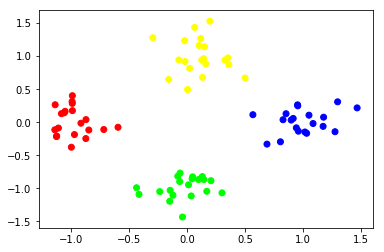

In [112]:
plotPoints(X, y_label)

In [113]:
def getLinearFeatures(X): #добавляем строку единиц 1
    return np.vstack((np.ones(X.shape[1]),X))

In [114]:
X_train = getLinearFeatures(X)

In [115]:
def one_hot_encoding(y_label): #
    C = int(y_label.max() + 1)
    enc = np.zeros((C, y_label.size)) #array 0 
    enc[y_label.astype(int), np.arange(y_label.size)] = 1
    return enc

In [122]:
print(y_label)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]


In [116]:
y_1 = np.array([1,2,3,0,2,3])
print(one_hot_encoding(y_1))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]]


In [117]:
def train(X_train, y_label ,iters = 10, alpha = 0.1):
    y = one_hot_encoding(y_label)
    C = y.shape[0]
    Nfeatures = X_train.shape[0]
    Nsamples = X_train.shape[1]
    W = np.random.rand(C, Nfeatures)
    for i in range(iters):
        z = softmax(W @ X_train)
        delta = z - y
        gradW = delta @ X_train.T
        W = W - alpha * gradW
    return W

In [118]:
W_opt = train(X_train, y_label)

In [119]:
print(W_opt)

[[ 0.31345542 -3.39058707  0.7607353 ]
 [ 0.06827754  0.40312084 -3.47228415]
 [ 0.19916064  4.24507138  0.39259983]
 [ 0.31605033  0.60563035  4.47838572]]


In [120]:
def predict(xx, yy, W_opt):
    x_1 = xx.reshape(-1)
    y_1 = yy.reshape(-1)
    X = getLinearFeatures(np.vstack((x_1, y_1)))
    y = np.argmax(W_opt @ X, axis = 0)
    return y.reshape(xx.shape)

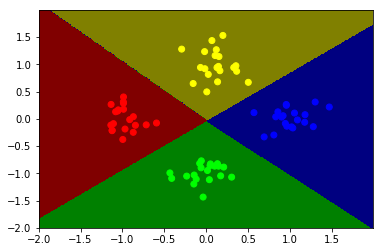

In [121]:
x = np.arange(-2,2,0.01)
y = np.arange(-2,2,0.01)
xx, yy = np.meshgrid(x,y)
colors = {0:[0.5, 0, 0],
          1:[0, 0.5, 0],
          2:[0, 0, 0.5],
          3:[0.5, 0.5, 0]}
labels = predict(xx, yy, W_opt)
plt.contourf(x, y, labels, levels = [-0.5, 0.5, 1.5, 2.5, 3.5], 
             colors = [[0.5, 0, 0], [0, 0.5, 0],[0, 0, 0.5], [0.5, 0.5, 0]])
plotPoints(X,y_label)